In [1]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf

# select data train and data test

In [2]:
import pathlib
import os
data_dir = pathlib.Path('C:/Users/jb2ch/OneDrive/Documents/COURS/mastercamp/IA_detect_dechet/dataset/')
data_val = pathlib.Path('C:/Users/jb2ch/OneDrive/Documents/COURS/mastercamp/IA_detect_dechet/dataval/')
print(data_dir)
print(os.path.abspath(data_dir))

C:\Users\jb2ch\OneDrive\Documents\COURS\mastercamp\IA_detect_dechet\dataset
C:\Users\jb2ch\OneDrive\Documents\COURS\mastercamp\IA_detect_dechet\dataset


# analyze datatrain

In [3]:
#count nomber of image in the data train
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

1905


# creat group test

In [4]:
 #batch_size is the image size that you will take at the same time in order to analyze them
batch_size = 30
#it for  resize the images so that they are all the same size
img_height = 200
img_width = 200

train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_val,
  #data_val,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)

Found 1905 files belonging to 2 classes.
Using 1524 files for training.
Found 471 files belonging to 2 classes.
Using 94 files for validation.
['bottle', 'plastic_bag']


# creat a neural network

In [5]:
from tensorflow.keras import layers

#number type of trash 
num_classes = 2

#creat layer
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],)

logdir="logs"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,
                                                   histogram_freq=1, 
                                                   write_images=logdir,
                                                   embeddings_data=train_data)

model.fit( 
    train_data,
    validation_data=val_data,
    #change epochs in depending on what level you want to train your model, more level = more time 
    epochs=1,
    callbacks=[tensorboard_callback]
)

C:\Users\jb2ch\anaconda3\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


51/51 [==============================] - 268s 5s/step - loss: 0.5948 - accuracy: 0.7579 - val_loss: 0.7950 - val_accuracy: 0.5319


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 197, 197, 128)     6272      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 95, 95, 64)        131136    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 32)        32800     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0

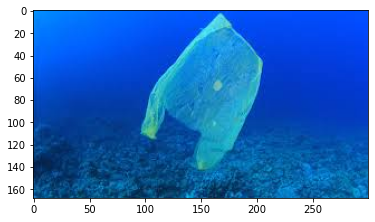

[1]
IT'S A plastic_bag !
[[0.38212463 0.61787546]]


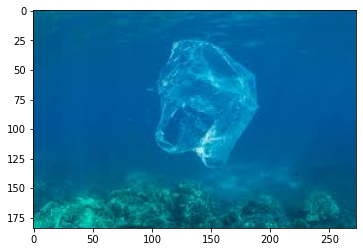

[1]
IT'S A plastic_bag !
[[0.4439271 0.5560729]]


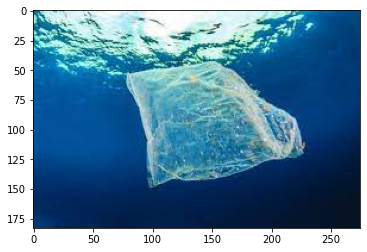

[0]
IT'S bottle  !
[[0.5790575  0.42094252]]


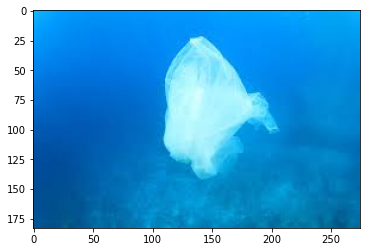

[1]
IT'S A plastic_bag !
[[0.4146291 0.5853709]]


In [18]:
import glob  
img = glob.glob('C:/Users/jb2ch/OneDrive/Documents/COURS/mastercamp/IA_detect_dechet\dataset\plastic_bag\*.jpg')

for i in range(0,4):
    filename = img[i]
    #take image in cv2
    image_to_predict = cv2.imread(filename,cv2.IMREAD_COLOR)
    
    #plot image
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.show()
    
    #change size
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0) 
    
    #res represents the choice between the 2 classes , if it 0 -> it's bootle else if it 1 -> it's pastic 
    
    predict_x=model.predict(img_to_predict) 
    classes_x=np.argmax(predict_x,axis=1)
    print(classes_x)
    #res = model.predict_classes(classes_x)
    
    if classes_x == 0:
        print("IT'S bottle  !")
        print(model.predict(img_to_predict))
    elif classes_x == 1 :
        print("IT'S A plastic_bag !")
        print(model.predict(img_to_predict))

## save model creat 

In [12]:
#save model 
#model.save('path/location3')

#charge  model 
#model = keras.models.load_model('path/to/location')

# analyze the result of the model according to the filters 

Shape of the image (374630,)


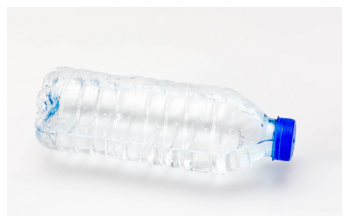

-----------------------------------------------------
1st convolutionnal layer
conv2d | Features Shape: (1, 197, 197, 128)
Dimension 128


<ipython-input-14-970ac8079b54>:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(dim/2,dim/2,i+1)


--------
-1nd Pooling
max_pooling2d | Features Shape: (1, 98, 98, 128)
Dimension 128
-----------------------------------------------------
-----------------------------------------------------
2st convolutionnal layer
conv2d_1 | Features Shape: (1, 95, 95, 64)
Dimension 64
--------
2nd Pooling
max_pooling2d_1 | Features Shape: (1, 47, 47, 64)
Dimension 64
-----------------------------------------------------
-----------------------------------------------------
3st convolutionnal layer
conv2d_2 | Features Shape: (1, 44, 44, 32)
Dimension 32
--------
3nd Pooling
max_pooling2d_2 | Features Shape: (1, 22, 22, 32)
Dimension 32
-----------------------------------------------------
-----------------------------------------------------
4st convolutionnal layer
conv2d_3 | Features Shape: (1, 19, 19, 16)
Dimension 16
--------
4nd Pooling
max_pooling2d_3 | Features Shape: (1, 9, 9, 16)
Dimension 16
-----------------------------------------------------


NameError: name 'image_plastic_bag' is not defined

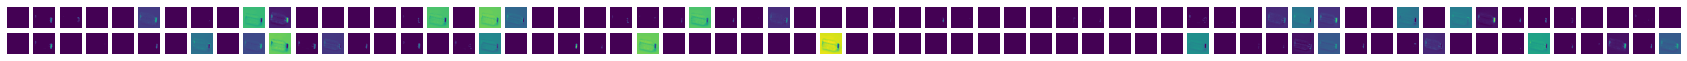

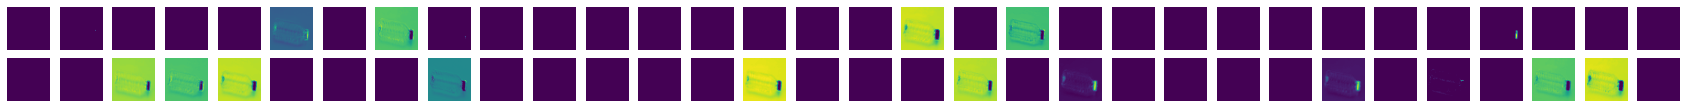

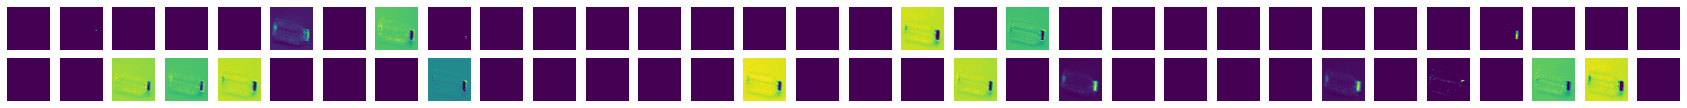

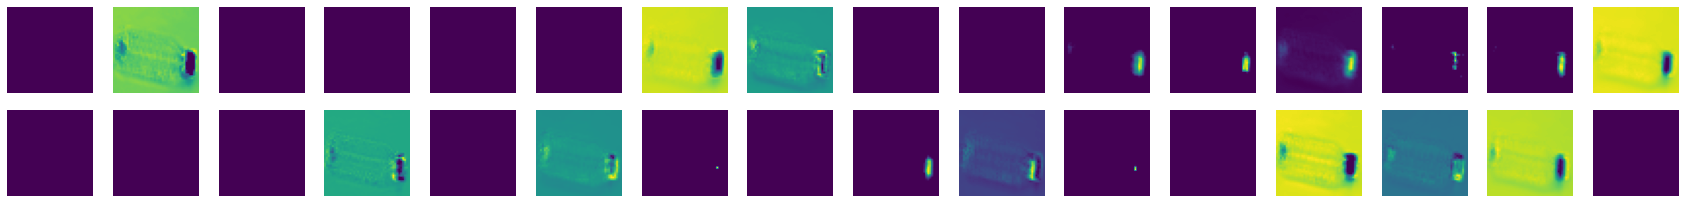

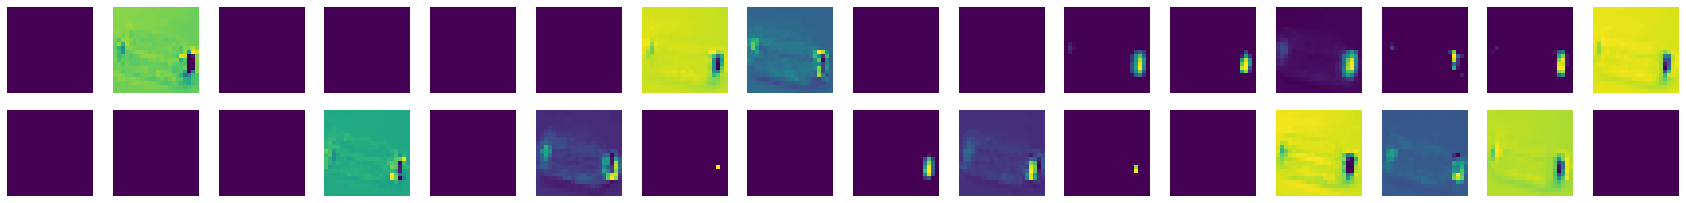

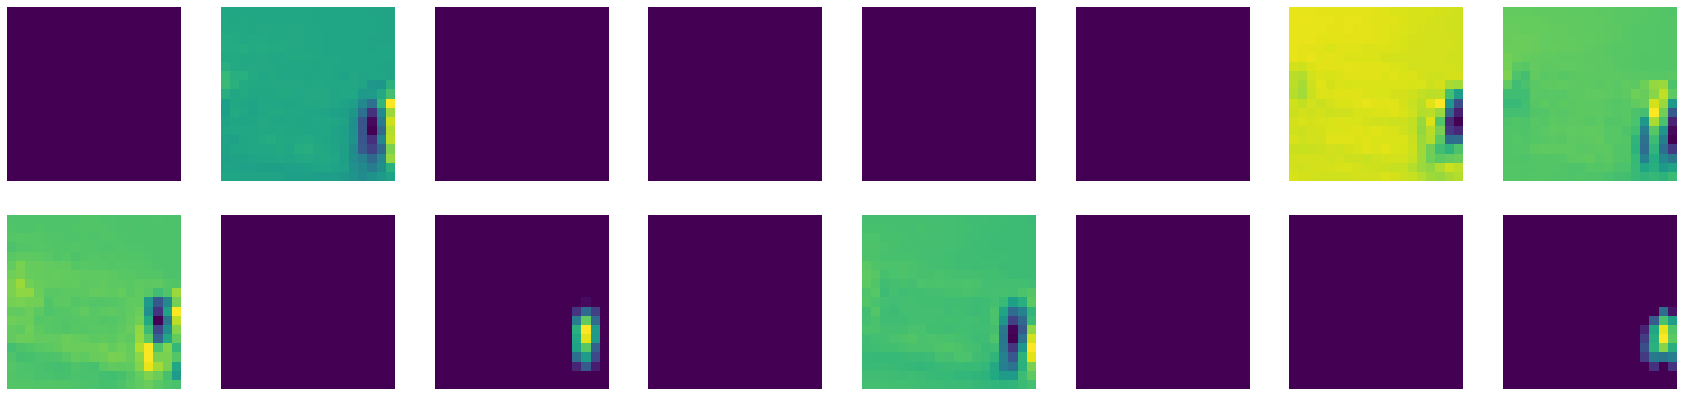

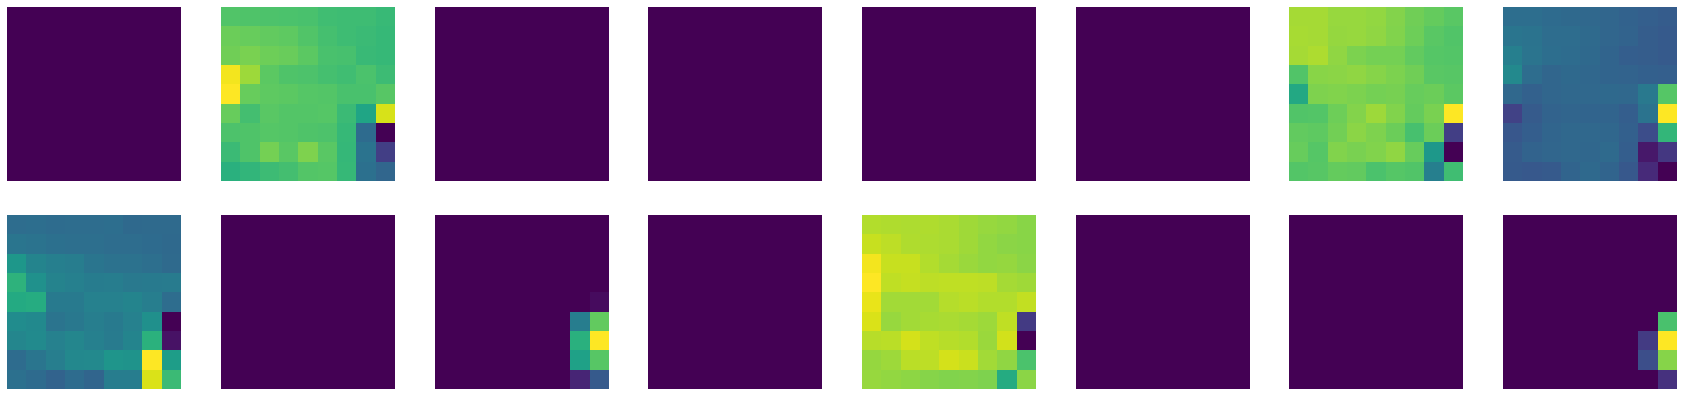

In [14]:
def display_image_filtered(name_image,model,layer_name,image):
    inp= model.inputs 
    out1= model.get_layer(layer_name).output  
    feature_map_1= Model(inputs= inp, outputs= out1)  
    img=cv2.resize(image,(200,200))              
    input_img= np.expand_dims(img, axis=0)      
    f=feature_map_1.predict(input_img) 
    dim = f.shape[3]
    print(f'{layer_name} | Features Shape: {f.shape}')
    print(f'Dimension {dim}')
    fig= plt.figure(figsize=(30,30))
    if not os.path.exists(f'results_{name_image}'):
        os.makedirs(f'results_{name_image}')        
    for i in range(dim):
        ax = fig.add_subplot(dim/2,dim/2,i+1)
        ax.axis('off')
        ax.imshow(f[0,:,:,i])
        plt.imsave(f'results_{name_image}/{name_image}_{layer_name}_{i}.jpg',f[0,:,:,i])

num = 0

url_bottle = r'https://www.numerama.com/content/uploads/2019/06/bouteille-plastique-eau-bacterie-sante.jpg?raw=true'
resp = requests.get(url_bottle, stream=True).raw
image_array_bottle = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_bottle.shape}')
image_bottle = cv2.imdecode(image_array_bottle, cv2.IMREAD_COLOR)

for name in ['bottle','plastic_bag']:
    if name == 'bottle':
        image = image_bottle
    elif name == 'plastic_bag':
        image = image_plastic_bag
    plt.axis('off')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    for i in range(0,4):
        if num == 0 and i==0:
            print('-----------------------------------------------------')
            print(f'{i+1}st convolutionnal layer')
            display_image_filtered(name,model,f'conv2d',image)
            print('--------')
            print(f'{i-1}nd Pooling')
            display_image_filtered(name,model,f'max_pooling2d',image)
            print('-----------------------------------------------------')
        else:
            print('-----------------------------------------------------')
            print(f'{i+1}st convolutionnal layer')
            display_image_filtered(name,model,f'conv2d_{num+i}',image)
            print('--------')
            print(f'{i+1}nd Pooling')
            display_image_filtered(name,model,f'max_pooling2d_{num+i}',image)
            print('-----------------------------------------------------')